Computes the 2D Fourier Transform of an image.
Shifts the low-frequency components to the center.
Creates an Ideal Low-Pass Filter (ILPF).
Applies the ILPF to smooth the image.
Justifies how high-frequency components are removed.
Shifts frequencies back to original positions.
Applies the Inverse Fourier Transform to restore the smoothed image.
Creates an Ideal High-Pass Filter (IHPF).
Retains only high-frequency components for edge detection.
Decentralizes high-frequency components and restores the image.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:


def fourier_transform(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    return f, fshift, magnitude_spectrum

def ideal_low_pass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), cutoff, 1, thickness=-1)
    return mask

def ideal_high_pass_filter(shape, cutoff):
    return 1 - ideal_low_pass_filter(shape, cutoff)

def apply_filter(fshift, mask):
    return fshift * mask

def inverse_fourier_transform(fshift):
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back



In [6]:
# Load and preprocess the image
image = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)

# Step 1: Fourier Transform
f, fshift, magnitude_spectrum = fourier_transform(image)

# Step 2: Shift low frequency to center (already done in fourier_transform)

# Step 3: Create Ideal Low Pass Filter
low_pass_mask = ideal_low_pass_filter(image.shape, 30)

# Step 4: Apply Low Pass Filter
filtered_fshift = apply_filter(fshift, low_pass_mask)

# Step 5: Justification - High frequencies removed (view filtered spectrum)
filtered_magnitude_spectrum = 20 * np.log(np.abs(filtered_fshift) + 1)

# Step 6: Decentralize low frequency components (undo shifting)
low_filtered_image = inverse_fourier_transform(filtered_fshift)

# Step 7: Apply inverse Fourier transform to get the smooth image

# Step 8: Create Ideal High Pass Filter
high_pass_mask = ideal_high_pass_filter(image.shape, 30)

# Step 9: Apply High Pass Filter for edge detection
filtered_fshift_high = apply_filter(fshift, high_pass_mask)

# Step 10: Decentralize high frequencies and apply inverse Fourier Transform
high_filtered_image = inverse_fourier_transform(filtered_fshift_high)




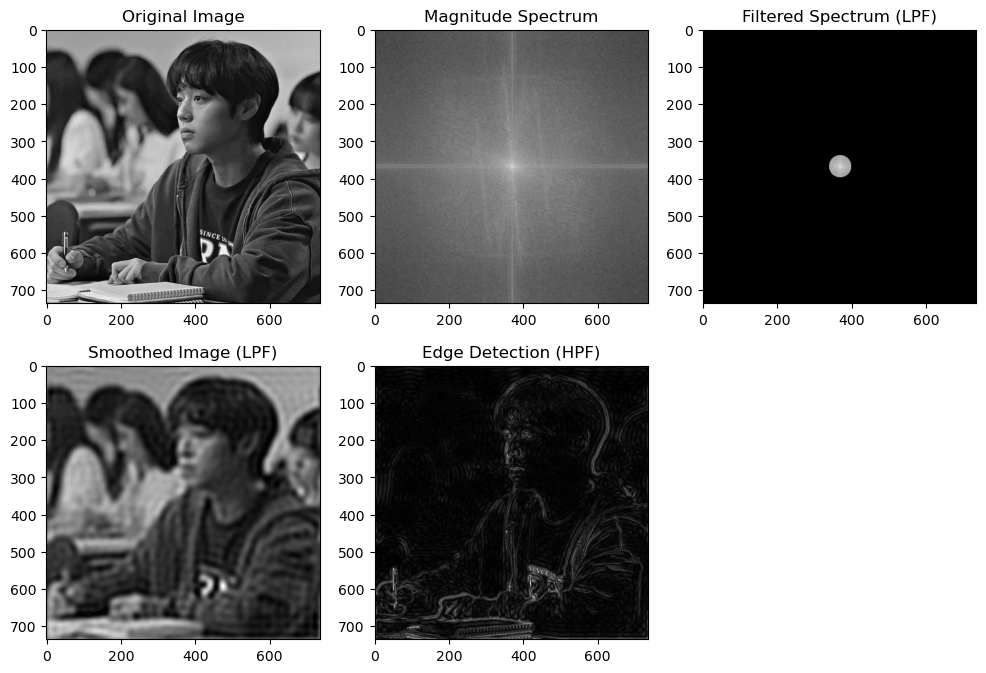

In [8]:
# Display Results
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 3, 2), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Magnitude Spectrum')
plt.subplot(2, 3, 3), plt.imshow(filtered_magnitude_spectrum, cmap='gray'), plt.title('Filtered Spectrum (LPF)')
plt.subplot(2, 3, 4), plt.imshow(low_filtered_image, cmap='gray'), plt.title('Smoothed Image (LPF)')
plt.subplot(2, 3, 5), plt.imshow(high_filtered_image, cmap='gray'), plt.title('Edge Detection (HPF)')
plt.show()
